**<center> <span style="color:#0F52BA;font-family:serif; font-size:34px;"> FAKE NEWS DETECTION USING LR </span> </center>**

# <span style="font-family:serif; font-size:28px;"> 📌Introduction</span>

The project focuses on Fake News Detection using Logistic Regression (LR).
With the rapid spread of online news through social media and digital platforms, misinformation and fake news have become major concerns. This project aims to build a machine learning model that can classify news articles as Fake News or Not Fake News.

The workflow includes:

Importing required libraries

Loading and preprocessing the dataset (removing stopwords, stemming, cleaning text)

Feature extraction using CountVectorizer

Training a Logistic Regression classifier

Testing the model with sample inputs

Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk as nlp
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset

In [10]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [11]:
df_true["text"] = df_true["text"].replace("(Reuters)","",regex=True)
df_true.head()
## The String "()" still remains in the text column to be removed which i take care of during the NLP part done below

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON () - The head of a conservative Rep...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON () - Transgender people will be all...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON () - The special counsel investigat...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON () - Trump campaign adviser George ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON () - President Donald Trump...,politicsNews,"December 29, 2017"


Inserting a column "class" as target feature

In [12]:
df_fake["target"] = 0
df_true["target"] = 1

In [13]:
df_true.head(10)

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON () - The head of a conservative Rep...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON () - Transgender people will be all...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON () - The special counsel investigat...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON () - Trump campaign adviser George ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON () - President Donald Trump...,politicsNews,"December 29, 2017",1
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON () - The Whit...",politicsNews,"December 29, 2017",1
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla () - President Donald Tru...",politicsNews,"December 29, 2017",1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
9,Alabama official to certify Senator-elect Jone...,WASHINGTON () - Alabama Secretary of State Joh...,politicsNews,"December 28, 2017",1


In [14]:
df_fake.head(10)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


Merging True and Fake Dataframes

In [15]:
df_fake = df_fake.drop(["title","subject","date"],axis = 1)
df_true = df_true.drop(["title","subject","date"],axis = 1)

In [16]:
df = pd.concat([df_fake,df_true],axis = 0)

In [17]:
df.head(10)

,text,target
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [18]:
df = df.sample(frac=1)
df.head(10)

,text,target
12235,Mark Wahlberg has been a rapper. He appeared s...,0
2954,Out of all the insane people who are part of T...,0
16151,LONDON () - Crude oil flows through an Iraqi K...,1
6310,Ever since the attacks on the U.S. diplomatic ...,0
2780,In what can only be seen as a groundbreaking a...,0
20255,"BAGHDAD/ERBIL, Iraq () - Iraq s Kurdish leader...",1
16577,How can you be prosecuted for something that i...,0
18094,We ve seen an escalation in violence against p...,0
3445,This woman is insane.In an incredibly disrespe...,0
18354,The last time a pope got involved in politics ...,0


In [19]:
df.reset_index(inplace=True)
df.drop(["index"], axis = 1, inplace = True)
df.head(10)

,text,target
0,Mark Wahlberg has been a rapper. He appeared s...,0
1,Out of all the insane people who are part of T...,0
2,LONDON () - Crude oil flows through an Iraqi K...,1
3,Ever since the attacks on the U.S. diplomatic ...,0
4,In what can only be seen as a groundbreaking a...,0
5,"BAGHDAD/ERBIL, Iraq () - Iraq s Kurdish leader...",1
6,How can you be prosecuted for something that i...,0
7,We ve seen an escalation in violence against p...,0
8,This woman is insane.In an incredibly disrespe...,0
9,The last time a pope got involved in politics ...,0


Data Pre-processing

In [20]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    # This is where i remove the "()" from the text column. You can do in whatever way you want 
    # The key is to remove the "(Reuters)" string as it is present in all text of True.csv.
    # The Model during the training part can memorize it and perfrom great in training and badly when other testing input is given.
    text = re.sub('[()]','',text)
    text = re.sub('\\W',' ',text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:9: SyntaxWarning: invalid escape sequence '\S'
<>:13: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:9: SyntaxWarning: invalid escape sequence '\S'
<>:13: SyntaxWarning: invalid escape sequence '\w'
/var/folders/xj/8pjs953d6js1smxmzd9xcvw00000gn/T/ipykernel_99632/4257964788.py:3: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]','',text)
/var/folders/xj/8pjs953d6js1smxmzd9xcvw00000gn/T/ipykernel_99632/4257964788.py:9: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
/var/folders/xj/8pjs953d6js1smxmzd9xcvw00000gn/T/ipykernel_99632/4257964788.py:13: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


In [21]:
df["text"] = df["text"].apply(wordopt)
df.head(100)

,text,target
0,mark wahlberg has been a rapper he appeared s...,0
1,out of all the insane people who are part of t...,0
2,london crude oil flows through an iraqi kur...,1
3,ever since the attacks on the u s diplomatic ...,0
4,in what can only be seen as a groundbreaking a...,0
...,...,...
95,the number of law enforcement officials killed...,0
96,republican presidential candidate marco rub...,1
97,berlin german police on monday investigated...,1
98,washington the u s house of representative...,1


Model (Logistic Regression) Training

In [22]:
X = df["text"]
Y = df["target"]
X.shape

(44898,)

In [23]:
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.25)
X_train.shape

(33673,)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
#print(X_train)
vectorization = TfidfVectorizer()
analyze = vectorization.build_analyzer()
#print(analyze(X_train[0]))
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(x_test)
print(xv_train.shape)
print(xv_test.shape)

(33673, 95490)
(11225, 95490)


In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(xv_train,Y_train)
print("The Accuracy of the Logistic Regression Model is {}".format(lr.score(xv_test,y_test)))

The Accuracy of the Logistic Regression Model is 0.9820044543429844


In [26]:
print(classification_report(y_test,lr.predict(xv_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5864
           1       0.98      0.98      0.98      5361

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



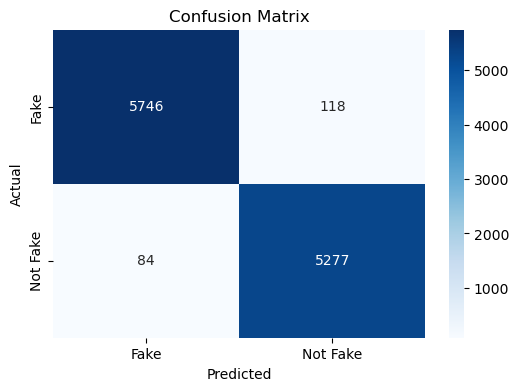

Classification Report:

              precision    recall  f1-score   support

        Fake       0.99      0.98      0.98      5864
    Not Fake       0.98      0.98      0.98      5361

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



In [30]:
# Predictions
y_pred = lr.predict(xv_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Not Fake"], yticklabels=["Fake", "Not Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Fake", "Not Fake"]))

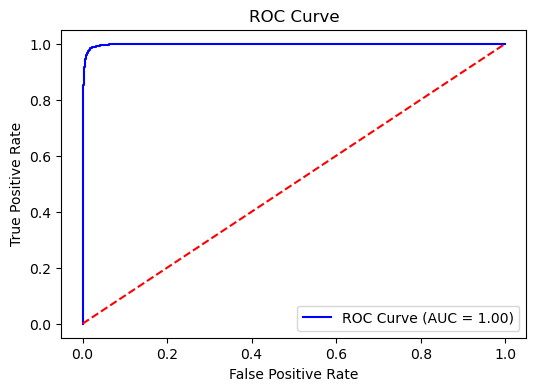

In [31]:
# Predicted probabilities for the positive class ("Not Fake")
y_pred_prob = lr.predict_proba(xv_test)[:, 1]

# ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="red", linestyle="--")  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

Creating a function to process the texts

In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "True News"

def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    
    pred_LR = lr.predict(new_xv_test)

    return print("\n\nLR Prediction: {}".format(output_lable(pred_LR[0])))


In [ ]:
news = str(input())
manual_testing(news)



LR Prediction: True News


In [ ]:
news = str(input())
manual_testing(news)



LR Prediction: Fake News


# <span style="font-family:serif; font-size:28px;"> 📌Result</span>

The Fake News Detection system successfully classifies input text as Fake News or Not Fake News using Logistic Regression.

The model provides predictions with good accuracy (based on the trained dataset).

Manual testing through user input confirms the working of the classifier.

This project demonstrates how Natural Language Processing (NLP) and Machine Learning can be combined to tackle real-world misinformation problems.

**<center> <span style="color:##FF00991;font-family:serif; font-size:34px;"> THANK YOU :)</span> </center>**